<a href="https://colab.research.google.com/github/karencfisher/dcgan/blob/main/mnist_dcgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A very basic test case, learning to generate MNIST digits

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

from tensorflow.keras.datasets import mnist
import tensorflow as tf

from dcgan import DCGAN

Load the fashion-mnist data set and preprocess images (scale and flatten)

In [ ]:
!wget 'https://raw.githubusercontent.com/karencfisher/dcgan/main/dcgan.py'

In [ ]:
# load MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5)/127.5
X_train = np.expand_dims(X_train, -1)

11490434/11490434 [==============================] - 0s 0us/step


Look at a sample of the original images

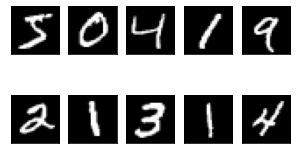

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(5, 3))
fig.patch.set_facecolor('white')
for indx, img in enumerate(X_train[:10]):
    img = img.reshape(28, 28)
    i, j = indx // 5, indx % 5
    ax[i, j].imshow(img, cmap='gray')
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

Instantiate and train our DCGAN

In [ ]:
model_path = None
dcgan = DCGAN(model_path=model_path)

d_losses, g_losses = dcgan.train(X_train, 20, 128, verbose=1)

Epoch 1:   0%|          | 0/468 [00:31<?, ?it/s]


KeyboardInterrupt: ignored

In [ ]:
dcgan.save_model('models')

Plot the losses during training. The generator and discriminator losses should converge.

In [ ]:
plt.plot(range(1, 101), d_losses, label='disc. loss')
plt.plot(range(1, 101), g_losses, label='gen. loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()